In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np
tqdm.pandas()

/mnt/datadisk2/aglv/anaconda3/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [4]:
cd /mnt/datadisk2/aglv/aglv/lab_aglv/forintern/

/mnt/datadisk2/aglv/aglv/lab_aglv/forintern


In [6]:
from DataDaily import DataDaily
datadaily = DataDaily()
close = datadaily.adjclose
close

load ./data_daily.h5...


InstrumentID,BJ430017,BJ430047,BJ430090,BJ430139,BJ430198,BJ430300,BJ430418,BJ430425,BJ430476,BJ430478,...,SZ301586,SZ301587,SZ301588,SZ301589,SZ301591,SZ301596,SZ301603,SZ301606,SZ301608,SZ301611
date,,,,,,,,,,,,,,,,,,,,,
20171009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20240827,17.959935,25.585340,11.419366,24.903127,14.133802,31.629625,62.685646,10.508621,12.089853,25.117365,...,NaN,49.006599,76.664120,33.055599,657.989822,90.160648,99.023947,51.362376,43.764045,212.775075
20240828,18.062271,25.318398,11.498944,24.467322,14.133802,31.816783,63.782188,10.659740,12.010575,24.706314,...,185.423798,49.121855,77.588290,34.644592,665.947543,91.793125,102.074713,52.501273,44.592360,225.286875
20240829,18.232831,25.010388,11.339789,22.879748,14.021406,32.331466,64.056323,10.787611,12.089853,25.247171,...,171.730597,50.366613,78.302422,34.644592,675.951534,93.605324,104.285819,54.386987,45.164494,244.948275


In [7]:
def cVaR_series(series, c_level=0.9, is_low=True):
    '''
    CVaR:分布的尾部积分, Parameters:
    c_level:p值,默认0.9
    is_low:返回的是否是左侧CVaR,=False时返回右侧,默认True
    '''
    right_VaR = series.quantile(c_level)
    left_VaR = series.quantile(1- c_level)

    if is_low:
        X_low = pd.Series(series[series < left_VaR])
        low_mean = X_low.mean() if len(X_low) > 0 else 0
        return low_mean
    else:
        X_high = pd.Series(series[series > right_VaR])
        high_mean = X_high.mean() if len(X_high) > 0 else 0
        return -high_mean

In [65]:
close_pct = close.loc[20220101:].pct_change()
f1 = close_pct.rolling(15).progress_apply(cVaR_series)
f1

3315904it [51:33, 1071.75it/s]


InstrumentID,BJ430017,BJ430047,BJ430090,BJ430139,BJ430198,BJ430300,BJ430418,BJ430425,BJ430476,BJ430478,...,SZ301586,SZ301587,SZ301588,SZ301589,SZ301591,SZ301596,SZ301603,SZ301606,SZ301608,SZ301611
date,,,,,,,,,,,,,,,,,,,,,
20220104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20220105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20220106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20220107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20220110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20240827,-0.019265,-0.035287,-0.047992,-0.032232,-0.040866,-0.041127,-0.035560,-0.034788,-0.055828,-0.045876,...,NaN,-0.043186,-0.035864,-0.049536,-0.059510,-0.059665,-0.054110,-0.057601,-0.069150,NaN
20240828,-0.019166,-0.035287,-0.047992,-0.032232,-0.040866,-0.041127,-0.035560,-0.034788,-0.055828,-0.045876,...,NaN,-0.043186,-0.035864,-0.049536,-0.059510,-0.059665,-0.054110,-0.057601,-0.069150,NaN
20240829,-0.019166,-0.035287,-0.047992,-0.048698,-0.040866,-0.041127,-0.035560,-0.034788,-0.055828,-0.045876,...,NaN,-0.043186,-0.034187,-0.043681,-0.037796,-0.059665,-0.042150,-0.055232,-0.051303,NaN


In [72]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import sys
import matplotlib.pyplot as plt

sys.path.append('/mnt/datadisk2/aglv/aglv/lab_aglv/forintern/')
from DataDaily import DataDaily

def factor_group(factor, group_number=10):
    '''按照因子值分组,grp1最小'''
    fg = factor.apply(
        lambda x: pd.qcut(x.rank(method='first'), q=group_number, labels=False) + 1, 
        axis=1)
    
    def _factor_group(factor_daily:pd.Series):
        dic = {f'group{str(g_value)}':factor_daily[factor_daily == g_value].index.tolist() for g_value in range(1, 1+group_number)}
        return pd.Series(dic)
    
    return {'group_stock':fg.apply(_factor_group, axis=1), 'group_index':fg}

def group_backtest(price:pd.DataFrame, factor:pd.DataFrame, group_number=10):
    '''
    分组回测,日度调仓  

    Para:
    price:日频价格数据,index:Date,
    factor:日度因子值,index:Date,
    group_number:分组数,默认值为10, 组数大的因子值大

    Return:
    index:日期, col:组别, value: 指定日期下指定组数的收益率
    '''
    factor = factor.set_index('date')
    factor = factor.shift(1)
    factor = factor.drop(factor.index[0])
    
    ret = price / price.shift(1)
    ret = ret.loc[factor.index, factor.columns].fillna(1)

    fg = factor_group(factor, group_number=group_number)['group_index']
    
    dic = {}
    for g_value in tqdm(range(1, 1+group_number)):
        is_in_group = fg.applymap(lambda x: 1 if x == g_value else 0)
        group_ret_daily = (ret * is_in_group).sum(axis=1) / is_in_group.sum(axis=1)
        dic[f'group{g_value}'] = group_ret_daily

    g_ret = pd.DataFrame(dic)
    # g_ret['g_mean'] = g_ret.mean(axis=1)
    g_ret['benchmark'] = ret.mean(axis=1)

    return g_ret

def group_backtest_plot(price:pd.DataFrame, factor:pd.DataFrame, group_number=5, save_path=None):
    '''
    分组回测,日度调仓  
    Para:
    price:日频价格数据,index:Date,
    factor:日度因子值,index:Date,
    group_number:分组数,默认值为10, 组数大的因子值大
    '''
    g_ret = group_backtest(price=price, factor=factor, group_number=group_number)
    g_ret.index = [str(i) for i in g_ret.index]
    g_ret_cumsum = g_ret.cumprod()

    # index_data = pd.read_csv('/mnt/datadisk2/aglv/aglv/lab_aglv/index_data/close.csv')
    # index_data.set_index('Unnamed: 0', inplace=True)
    # zz1000 = index_data.loc[852, :]
    # zz1000 = zz1000.loc[g_ret.index]
    # zz1000_bt = zz1000 / zz1000.iloc[0]
    # g_ret_cumsum['zz1000'] = zz1000_bt
    
    plt.style.use('seaborn')
    g_ret_cumsum.plot(figsize=(12, 6), linewidth=1)
    # plt.plot(zz1000_bt, linewidth=2)
    plt.legend()
    if save_path is not None:
        plt.savefig(save_path, facecolor='white', dpi=300)
    plt.show()

In [75]:
f1.to_csv('/mnt/datadisk2/aglv/aglv/lab_aglv/aglv_factor/factor_829/cvar_neg_0.9_22_24_min.csv')

100%|██████████| 15/15 [00:27<00:00,  1.82s/it]


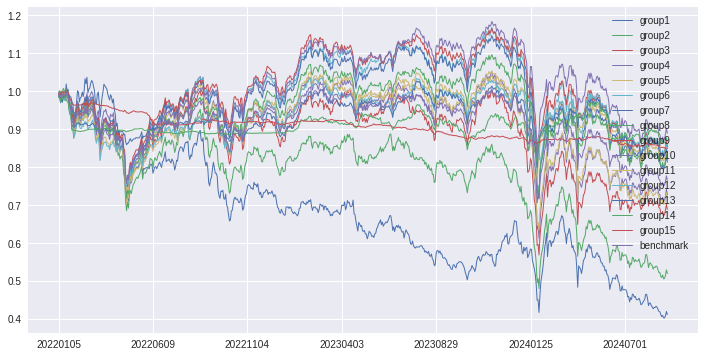

In [74]:
group_backtest_plot(close, f1.reset_index().fillna(0), group_number=15)

In [11]:
def factor_group(factor, group_number=10):
    '''按照因子值分组,grp1最小'''
    fg = factor.apply(
        lambda x: pd.qcut(x.rank(method='first'), q=group_number, labels=False) + 1, 
        axis=1)
    
    def _factor_group(factor_daily:pd.Series):
        dic = {f'group{str(g_value)}':factor_daily[factor_daily == g_value].index.tolist() for g_value in range(1, 1+group_number)}
        return pd.Series(dic)
    
    return {'group_stock':fg.apply(_factor_group, axis=1), 'group_index':fg}

In [18]:
f2 = f1.iloc[-3].dropna()
f2

InstrumentID
BJ430017   -0.019166
BJ430047   -0.035287
BJ430090   -0.047992
BJ430139   -0.048698
BJ430198   -0.040866
              ...   
SZ301591   -0.037796
SZ301596   -0.059665
SZ301603   -0.042150
SZ301606   -0.055232
SZ301608   -0.051303
Name: 20240829, Length: 5376, dtype: float64

In [19]:
f2 = f2.sort_values()
f2

InstrumentID
SH601107   -0.354350
SZ301288   -0.181180
SZ301487   -0.181051
SZ300256   -0.162500
SH688426   -0.162430
              ...   
SZ002288    0.000000
SZ002325    0.000000
SH600321    0.000000
SH600297    0.000000
SZ000976    0.000000
Name: 20240829, Length: 5376, dtype: float64

In [20]:
close

InstrumentID,BJ430017,BJ430047,BJ430090,BJ430139,BJ430198,BJ430300,BJ430418,BJ430425,BJ430476,BJ430478,...,SZ301586,SZ301587,SZ301588,SZ301589,SZ301591,SZ301596,SZ301603,SZ301606,SZ301608,SZ301611
date,,,,,,,,,,,,,,,,,,,,,
20171009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20240827,17.959935,25.585340,11.419366,24.903127,14.133802,31.629625,62.685646,10.508621,12.089853,25.117365,...,NaN,49.006599,76.664120,33.055599,657.989822,90.160648,99.023947,51.362376,43.764045,212.775075
20240828,18.062271,25.318398,11.498944,24.467322,14.133802,31.816783,63.782188,10.659740,12.010575,24.706314,...,185.423798,49.121855,77.588290,34.644592,665.947543,91.793125,102.074713,52.501273,44.592360,225.286875
20240829,18.232831,25.010388,11.339789,22.879748,14.021406,32.331466,64.056323,10.787611,12.089853,25.247171,...,171.730597,50.366613,78.302422,34.644592,675.951534,93.605324,104.285819,54.386987,45.164494,244.948275


In [45]:
close_2 = close.loc[20240601:]
close_2

InstrumentID,BJ430017,BJ430047,BJ430090,BJ430139,BJ430198,BJ430300,BJ430418,BJ430425,BJ430476,BJ430478,...,SZ301586,SZ301587,SZ301588,SZ301589,SZ301591,SZ301596,SZ301603,SZ301606,SZ301608,SZ301611
date,,,,,,,,,,,,,,,,,,,,,
20240603,18.059898,31.211650,10.623592,31.595842,16.156931,35.419566,70.041614,12.690043,16.232114,27.021179,...,NaN,66.617625,105.290648,47.867656,1069.517665,179.123148,NaN,NaN,NaN,NaN
20240604,17.943275,31.396456,10.703169,30.661975,15.819743,35.092040,70.407128,12.932683,16.569044,26.393786,...,NaN,79.941150,113.001959,46.866034,1127.267981,171.694630,NaN,NaN,NaN,NaN
20240605,17.660048,31.930340,10.504225,31.315682,14.470990,34.390199,68.442491,12.415052,16.291572,25.701490,...,NaN,73.832614,109.208828,45.274979,1006.537990,152.913657,NaN,NaN,NaN,NaN
20240606,17.526764,31.766068,9.230986,31.938260,12.475960,33.220465,68.031287,11.543208,16.172655,24.836120,...,NaN,74.616351,100.663862,44.619597,934.918503,142.879167,NaN,NaN,NaN,NaN
20240607,17.809991,31.683932,9.549296,31.471327,13.599921,33.454412,68.214044,11.636205,16.291572,25.290439,...,NaN,70.812922,102.622952,44.248625,959.473756,140.333102,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20240827,17.959935,25.585340,11.419366,24.903127,14.133802,31.629625,62.685646,10.508621,12.089853,25.117365,...,NaN,49.006599,76.664120,33.055599,657.989822,90.160648,99.023947,51.362376,43.764045,212.775075
20240828,18.062271,25.318398,11.498944,24.467322,14.133802,31.816783,63.782188,10.659740,12.010575,24.706314,...,185.423798,49.121855,77.588290,34.644592,665.947543,91.793125,102.074713,52.501273,44.592360,225.286875
20240829,18.232831,25.010388,11.339789,22.879748,14.021406,32.331466,64.056323,10.787611,12.089853,25.247171,...,171.730597,50.366613,78.302422,34.644592,675.951534,93.605324,104.285819,54.386987,45.164494,244.948275


In [62]:
date = close_2.index.to_list()
res = pd.Series(index=date)
res2 = pd.Series(index=date)
for i in date:
    f_list = f1.loc[i].sort_values(ascending=False).iloc[50:300].index
    res.loc[i] = close_pct.loc[i].loc[f_list].mean()
    res2.loc[i] = f_list.to_list()

res

<ipython-input-62-24daa9b813c1>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res = pd.Series(index=date)
<ipython-input-62-24daa9b813c1>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res2 = pd.Series(index=date)


20240603   -0.003909
20240604    0.007104
20240605   -0.005547
20240606   -0.004344
20240607    0.005599
              ...   
20240827   -0.000625
20240828    0.002429
20240829    0.006599
20240830    0.010685
20240902   -0.001013
Length: 65, dtype: float64

In [63]:
res2

20240603    [SZ000582, SH601166, SH600028, SH600299, SH600...
20240604    [SH601166, SH600028, SH600299, SH600269, SH600...
20240605    [SH601728, SH600967, SH601158, SH601311, SH601...
20240606    [SH601728, SZ002415, SH601166, SH600050, SH600...
20240607    [SZ002415, SH601166, SH600050, SH600028, SH601...
                                  ...                        
20240827    [SH600919, SZ002221, SH601318, SH600036, SZ000...
20240828    [SH600919, SH601166, SZ000001, SH600350, SH600...
20240829    [SH603856, SH601005, SH601211, SZ000782, SH688...
20240830    [SZ000731, SH603856, SH600211, SH601005, SH601...
20240902    [SZ000731, SZ002221, SH605151, SH603856, SZ300...
Length: 65, dtype: object

In [64]:
res2.iloc[-1]

['SZ000731',
 'SZ002221',
 'SH605151',
 'SH603856',
 'SZ300849',
 'BJ831726',
 'SH601005',
 'SH600096',
 'SZ000782',
 'SH688557',
 'SZ000419',
 'SZ000538',
 'SH603199',
 'SH601811',
 'SH603587',
 'SH601686',
 'SH603759',
 'SZ002734',
 'BJ832735',
 'BJ834261',
 'SZ001227',
 'SH688115',
 'SH600273',
 'SZ001318',
 'SZ002034',
 'SH605500',
 'SZ002262',
 'SH600116',
 'BJ836419',
 'SZ000651',
 'SH601010',
 'SH600075',
 'SH600057',
 'SZ300741',
 'SH603077',
 'SH601007',
 'SZ002396',
 'SH688420',
 'SH603281',
 'SZ300577',
 'SH688538',
 'SH600573',
 'SZ000513',
 'SH600726',
 'SH688057',
 'SH600959',
 'SZ300911',
 'SZ002020',
 'SZ002054',
 'SH600233',
 'SH605507',
 'SH600941',
 'SH605005',
 'SZ002228',
 'SZ002627',
 'SZ301286',
 'SH600328',
 'SZ002004',
 'SZ002108',
 'SZ000719',
 'SH601336',
 'SH600415',
 'SH600900',
 'SH601318',
 'SZ001238',
 'BJ833914',
 'SH600115',
 'SH600388',
 'SZ301033',
 'SH600470',
 'SZ301106',
 'SH601222',
 'SH600169',
 'BJ838163',
 'SH600757',
 'SZ002841',
 'SH603228',

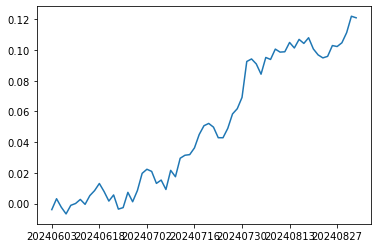

In [61]:
res_cumsum = res.cumsum()
res_cumsum.index = [str(i) for i in res_cumsum.index]
res_cumsum.plot()